# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 11.9MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb/view?usp=sharing'''

id = "1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb"
gdown.download(id=id, output="bert_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb
To: /content/bert_sentiment_scores.csv
100%|██████████| 5.68M/5.68M [00:00<00:00, 36.1MB/s]


'bert_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("bert_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


In [ ]:
df_rating.describe()

,sentiment_score
count,33136.000000
mean,2.879889
std,1.869132
min,1.002817
25%,1.004068
50%,2.999288
75%,4.996725
max,4.997131


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

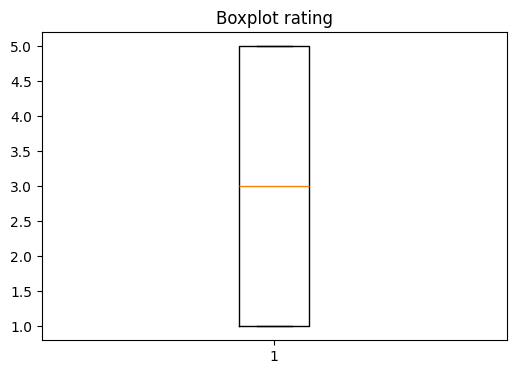

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,17 Again,1.01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1BR,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
3,3 Days to Kill,0.00,0.0,0.0,0.0,1.0,1.00,5.00,0.0,0.0,...,0.00,1.01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0
4,3 Idiots,5.00,0.0,1.0,0.0,0.0,0.00,4.98,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,1.00,0.0,5.0,0.0,1.0,2.98,5.00,5.0,0.0,...,1.01,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
850,iNumber Number: Jozi Gold,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
851,¡Que viva México!,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
852,¿Encontró lo que buscaba?,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29781
Persentase sparsity: 89.42%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.0,0.0,0.0,1.00,1.00,5.00,0.00,0.00,...,0.00,1.01,0.0,0.00,3.0,0.0,0.00,0.00,0.00,0
1,3 Idiots,5.00,0.0,1.0,0.0,0.00,0.00,4.98,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0
2,5 Cowok Jagoan,0.00,1.0,0.0,0.0,0.00,5.00,5.00,4.99,0.00,...,0.00,0.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
3,6 Underground,1.00,3.0,0.0,0.0,4.59,5.00,0.00,1.00,0.00,...,0.00,1.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
4,65,1.01,1.0,5.0,1.0,1.00,4.99,3.00,1.00,1.00,...,5.00,5.00,5.0,1.02,5.0,1.0,1.01,0.00,1.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,1.00,0.0,0.0,5.0,0.00,0.00,0.00,0.00,2.11,...,0.00,0.00,0.0,1.30,0.0,0.0,1.00,0.00,0.00,1
271,Young Adult,0.00,0.0,0.0,0.0,0.00,5.00,1.00,5.00,0.00,...,0.00,1.00,0.0,0.00,1.0,0.0,0.00,0.00,0.00,0
272,Your Place or Mine,1.00,0.0,0.0,3.0,0.00,0.00,0.00,0.00,5.00,...,0.00,0.00,0.0,0.00,0.0,1.0,5.00,0.00,0.00,0
273,Zodiac,5.00,0.0,1.0,0.0,0.00,1.01,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,4.99,0.00,0


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7709
Persentase sparsity: 71.88%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.0,0.0,0.0,0.200,0.200,1.000,0.000,0.000,...,0.000,0.202,0.0,0.000,0.6,0.0,0.000,0.000,0.000,0.0
1,3 Idiots,1.000,0.0,0.2,0.0,0.000,0.000,0.996,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2,5 Cowok Jagoan,0.000,0.2,0.0,0.0,0.000,1.000,1.000,0.998,0.000,...,0.000,0.000,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
3,6 Underground,0.200,0.6,0.0,0.0,0.918,1.000,0.000,0.200,0.000,...,0.000,0.200,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
4,65,0.202,0.2,1.0,0.2,0.200,0.998,0.600,0.200,0.200,...,1.000,1.000,1.0,0.204,1.0,0.2,0.202,0.000,0.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.422,...,0.000,0.000,0.0,0.260,0.0,0.0,0.200,0.000,0.000,1.0
271,Young Adult,0.000,0.0,0.0,0.0,0.000,1.000,0.200,1.000,0.000,...,0.000,0.200,0.0,0.000,0.2,0.0,0.000,0.000,0.000,0.0
272,Your Place or Mine,0.200,0.0,0.0,0.6,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.0,0.000,0.0,0.2,1.000,0.000,0.000,0.0
273,Zodiac,1.000,0.0,0.2,0.0,0.000,0.202,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.998,0.000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,1.000,0.000,0.200,0.202,0.200,1.000,0.200,1.000,0.0,...,0.200,0.200,0.204,0.200,1.0,0.200,0.0,0.200,1.000,0.200
bicaraboxoffice,0.000,0.000,0.200,0.600,0.200,0.000,0.000,0.202,0.000,0.2,...,0.200,0.600,0.204,0.000,0.0,0.000,0.0,0.000,0.000,0.000
WatchmenID,0.000,0.200,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.0,...,1.000,1.000,0.000,0.000,0.6,0.000,0.0,0.000,0.200,1.000
ErikDavis,0.000,0.000,0.000,0.000,0.200,0.000,0.000,1.000,0.000,0.0,...,0.000,0.200,0.000,0.000,0.0,1.000,0.0,0.600,0.000,0.000
arulfittron,0.200,0.000,0.000,0.918,0.200,0.000,0.202,0.000,0.000,0.2,...,0.000,0.000,0.000,0.000,1.0,0.000,0.0,0.000,0.000,0.200
GilaFilmID,0.200,0.000,1.000,1.000,0.998,0.000,0.000,0.200,1.000,0.6,...,0.200,0.688,1.000,1.000,0.0,0.000,1.0,0.000,0.202,0.596
TarizSolis,1.000,0.996,1.000,0.000,0.600,0.000,0.000,1.000,1.000,0.6,...,1.000,0.000,1.000,0.000,0.0,0.000,0.2,0.000,0.000,1.000
djaycoholyc,0.000,0.000,0.998,0.200,0.200,0.600,0.000,1.000,0.200,0.2,...,0.000,0.200,1.000,0.000,1.0,0.000,1.0,0.000,0.000,1.000
akstanwyck,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.000,0.992,0.000,0.000,0.0,0.422,0.0,1.000,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.600,0.202,0.000,0.000,0.0,1.000,0.0,0.200,0.000,0.000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

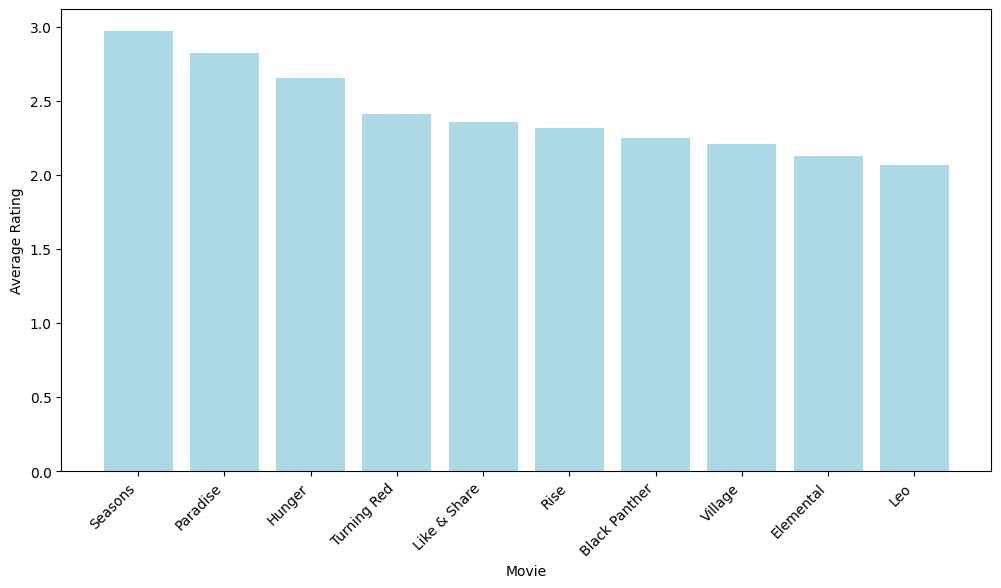

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# **Collaborative Filtering**

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,0.530,0.000,-0.390,-0.248,-0.340,0.470,-0.500,0.230,0.00,...,-0.380,-0.390,-0.556,-0.360,0.13,-0.310,0.00,-0.540,0.270,-0.520
bicaraboxoffice,0.000,0.000,-0.670,0.070,-0.240,0.000,0.000,-0.458,0.000,-0.15,...,-0.340,0.040,-0.476,0.000,0.00,0.000,0.00,0.000,0.000,0.000
WatchmenID,0.000,-0.190,0.000,0.000,0.570,0.000,0.000,0.380,0.000,0.00,...,0.490,0.470,0.000,0.000,-0.17,0.000,0.00,0.000,-0.410,0.320
ErikDavis,0.000,0.000,0.000,0.000,-0.210,0.000,0.000,0.420,0.000,0.00,...,0.000,-0.310,0.000,0.000,0.00,0.530,0.00,-0.080,0.000,0.000
arulfittron,-0.340,0.000,0.000,0.438,-0.200,0.000,-0.248,0.000,0.000,-0.11,...,0.000,0.000,0.000,0.000,0.32,0.000,0.00,0.000,0.000,-0.440
GilaFilmID,-0.270,0.000,0.280,0.570,0.608,0.000,0.000,-0.340,0.340,0.33,...,-0.280,0.198,0.380,0.510,0.00,0.000,0.44,0.000,-0.308,-0.004
TarizSolis,0.590,0.676,0.400,0.000,0.220,0.000,0.000,0.490,0.430,0.37,...,0.550,0.000,0.450,0.000,0.00,0.000,-0.30,0.000,0.000,0.440
djaycoholyc,0.000,0.000,0.498,-0.190,-0.170,0.140,0.000,0.530,-0.290,-0.01,...,0.000,-0.260,0.500,0.000,0.39,0.000,0.55,0.000,0.000,0.480
akstanwyck,0.000,0.000,0.000,0.000,-0.150,0.000,0.000,-0.250,0.000,0.00,...,0.000,0.552,0.000,0.000,0.00,-0.018,0.00,0.360,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,-0.140,0.000,0.000,-0.220,0.000,0.00,...,0.170,-0.218,0.000,0.000,0.00,0.600,0.00,-0.390,0.000,0.000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***Item-Based***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,0.370,0.000,-0.600,-0.408,-0.520,0.290,-0.750,-0.030,0.00,...,-0.590,-0.600,-0.826,-0.550,-0.17,-0.490,0.00,-0.800,0.020,-0.780
bicaraboxoffice,0.000,0.000,-0.960,-0.110,-0.400,0.000,0.000,-0.688,0.000,-0.27,...,-0.530,-0.160,-0.716,0.000,0.00,0.000,0.00,0.000,0.000,0.000
WatchmenID,0.000,-0.320,0.000,0.000,0.420,0.000,0.000,0.160,0.000,0.00,...,0.310,0.280,0.000,0.000,-0.44,0.000,0.00,0.000,-0.610,0.080
ErikDavis,0.000,0.000,0.000,0.000,-0.360,0.000,0.000,0.210,0.000,0.00,...,0.000,-0.490,0.000,0.000,0.00,0.360,0.00,-0.320,0.000,0.000
arulfittron,-0.530,0.000,0.000,0.268,-0.350,0.000,-0.398,0.000,0.000,-0.21,...,0.000,0.000,0.000,0.000,0.08,0.000,0.00,0.000,0.000,-0.670
GilaFilmID,-0.430,0.000,0.040,0.420,0.468,0.000,0.000,-0.530,0.120,0.24,...,-0.450,0.028,0.170,0.340,0.00,0.000,0.24,0.000,-0.478,-0.214
TarizSolis,0.450,0.566,0.200,0.000,0.080,0.000,0.000,0.310,0.240,0.29,...,0.390,0.000,0.260,0.000,0.00,0.000,-0.48,0.000,0.000,0.240
djaycoholyc,0.000,0.000,0.328,-0.330,-0.300,-0.020,0.000,0.360,-0.460,-0.08,...,0.000,-0.430,0.330,0.000,0.18,0.000,0.39,0.000,0.000,0.290
akstanwyck,0.000,0.000,0.000,0.000,-0.280,0.000,0.000,-0.410,0.000,0.00,...,0.000,0.392,0.000,0.000,0.00,-0.168,0.00,0.130,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,-0.260,0.000,0.000,-0.370,0.000,0.00,...,0.020,-0.368,0.000,0.000,0.00,0.460,0.00,-0.600,0.000,0.000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,0.117877,-0.221766,-0.147050,-0.321419,0.223510,-0.194297,0.170084,0.341081,-0.164702,...,-0.050512,-0.224148,-0.182349,-0.343342,0.179751,-0.123893,-0.200929,-0.252217,0.174036,-0.148307
5 Cowok Jagoan,0.117877,1.000000,0.236627,0.136963,-0.111893,0.000000,0.358728,0.181860,0.373570,-0.091348,...,0.257577,0.083711,0.329134,0.008776,0.237035,0.000000,0.027832,-0.052660,-0.012888,0.060341
6 Underground,-0.221766,0.236627,1.000000,0.086619,0.199076,-0.174733,0.052998,0.511672,0.112369,0.023050,...,0.081690,0.430579,0.280471,0.184906,0.243043,0.138945,0.006840,0.116549,0.011030,-0.035630
65,-0.147050,0.136963,0.086619,1.000000,0.382170,-0.045226,0.192167,0.071246,0.254651,0.307432,...,0.376555,0.135381,0.155282,0.106944,0.059188,0.033975,-0.143315,0.300498,-0.231325,0.296850
A Classic Horror Story,-0.321419,-0.111893,0.199076,0.382170,1.000000,-0.306418,0.236720,0.023400,-0.017854,0.042947,...,0.318371,0.196642,0.376554,0.336368,-0.033792,0.086851,-0.294102,0.219168,-0.007806,0.407060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,-0.123893,0.000000,0.138945,0.033975,0.086851,-0.049673,0.000153,0.010731,0.011565,-0.119076,...,0.162921,-0.163021,0.080162,0.079281,0.133918,1.000000,-0.000866,0.013191,-0.005691,0.109836
Young Adult,-0.200929,0.027832,0.006840,-0.143315,-0.294102,0.216709,-0.027536,-0.233300,-0.128746,-0.151516,...,0.020827,0.123232,0.192064,-0.068116,0.349123,-0.000866,1.000000,-0.052930,-0.170163,0.032952
Your Place or Mine,-0.252217,-0.052660,0.116549,0.300498,0.219168,-0.153291,0.487665,-0.018289,0.173659,0.180999,...,0.119093,0.289339,0.332434,0.297625,0.104463,0.013191,-0.052930,1.000000,0.068402,0.424357


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film My Stupid Boss 2 (Score: 0.7545)
No. 2: Film The Woman in the Window (Score: 0.6423)
No. 3: Film Us and Them (Score: 0.6285)
No. 4: Film Sinister 2 (Score: 0.6095)
No. 5: Film Lincoln (Score: 0.5954)
No. 6: Film The Conjuring 2 (Score: 0.5725)
No. 7: Film Murder Mystery 2 (Score: 0.5565)
No. 8: Film The Princess and the Frog (Score: 0.5563)
No. 9: Film The Disaster Artist (Score: 0.5458)
No. 10: Film Star Trek (Score: 0.5367)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB.xlsx")

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

y_actualib = df_actual_values.flatten()
y_predib = df_pred_values.flatten()

In [ ]:
MAE_ib = mean_absolute_error(y_actualib, y_predib)
MSE_ib = mean_squared_error(y_actualib, y_predib)
rmse_cbf_ib = math.sqrt(MSE_ib)

print("Mean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)

Mean Absolute Error (MAE): 0.0649076683333098
Root Mean Square Error (RMSE): 0.08996453923932698


# **Content-Based Filtering**

In [ ]:
df_cbf = df_normalized.copy()
df_cbf

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.0,0.0,0.0,0.200,0.200,1.000,0.000,0.000,...,0.000,0.202,0.0,0.000,0.6,0.0,0.000,0.000,0.000,0.0
1,3 Idiots,1.000,0.0,0.2,0.0,0.000,0.000,0.996,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2,5 Cowok Jagoan,0.000,0.2,0.0,0.0,0.000,1.000,1.000,0.998,0.000,...,0.000,0.000,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
3,6 Underground,0.200,0.6,0.0,0.0,0.918,1.000,0.000,0.200,0.000,...,0.000,0.200,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
4,65,0.202,0.2,1.0,0.2,0.200,0.998,0.600,0.200,0.200,...,1.000,1.000,1.0,0.204,1.0,0.2,0.202,0.000,0.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.422,...,0.000,0.000,0.0,0.260,0.0,0.0,0.200,0.000,0.000,1.0
271,Young Adult,0.000,0.0,0.0,0.0,0.000,1.000,0.200,1.000,0.000,...,0.000,0.200,0.0,0.000,0.2,0.0,0.000,0.000,0.000,0.0
272,Your Place or Mine,0.200,0.0,0.0,0.6,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.0,0.000,0.0,0.2,1.000,0.000,0.000,0.0
273,Zodiac,1.000,0.0,0.2,0.0,0.000,0.202,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.998,0.000,0.0


## ***Set Columns***

In [ ]:
kolom = ['name', 'description', 'genre', 'keywords']
df_film_cbf = df_film[kolom].copy()

df_film_cbf

,name,description,genre,keywords
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"['Action', 'Comedy', 'Drama']","spy,violence,dirty bomb,massacre,cough syrup"
1,3 Idiots,0,"['Comedy', 'Drama']","hairy chest,motivation,coming of age,against t..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"['Action', 'Comedy']","rescue,fight,martial arts,gun,sword"
3,6 Underground,0,"['Action', 'Thriller']","yacht,the future,ensemble cast,italy,florence ..."
4,65,An astronaut crash lands on a mysterious plane...,"['Action', 'Adventure', 'Drama']","gun,shot in the eye,suicide contemplation,astr..."
...,...,...,...,...
270,You People,"Follows a new couple and their families, who f...","['Comedy', 'Romance']","racial tension,black american,couple,love,life"
271,Young Adult,0,"['Comedy', 'Drama']","emotional breakdown,mental illness,narcissism,..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"['Comedy', 'Romance']","friend,best friend,volunteer,teenager,son"
273,Zodiac,0,"['Crime', 'Drama', 'Mystery']","zodiac killer,serial killer,mysterious murdere..."


In [ ]:
# mengganti nilai string '0'
df_film_cbf['description'] = df_film_cbf['description'].replace('0', '')

df_film_cbf['content'] = df_film_cbf['description'].astype(str) + ' ' + \
                         df_film_cbf['genre'].astype(str) + ' ' + \
                         df_film_cbf['keywords'].astype(str)

In [ ]:
df_film_cbf['content']

,content
0,A dying CIA agent trying to reconnect with his...
1,"['Comedy', 'Drama'] hairy chest,motivation,co..."
2,5 lifelong friends attempt to rescue a damsel ...
3,"['Action', 'Thriller'] yacht,the future,ensem..."
4,An astronaut crash lands on a mysterious plane...
...,...
270,"Follows a new couple and their families, who f..."
271,"['Comedy', 'Drama'] emotional breakdown,menta..."
272,Two long-distance best friends change each oth...
273,"['Crime', 'Drama', 'Mystery'] zodiac killer,s..."


# ***Word Embedding DistilBERT***

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# tokenizer dan Distilbert
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# word embedding dari teks
def get_embedding(text):
    tokens = tokenizer.encode(text, return_tensors='pt')

    # output embedding dari model
    with torch.no_grad():
        output = model(tokens)

    embedding = output.last_hidden_state.mean(dim=1)

    return embedding.numpy()

# terapkan fungsi pada kolom 'content'
df_film_cbf['embedding'] = df_film_cbf['content'].apply(get_embedding)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
df_film_cbf[['name', 'content', 'embedding']]

,name,content,embedding
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"[[0.02597541, 0.13719822, 0.1801008, -0.024634..."
1,3 Idiots,"['Comedy', 'Drama'] hairy chest,motivation,co...","[[0.12613922, 0.26205394, 0.09137705, -0.24748..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"[[0.107086934, 0.20807602, 0.19547209, -0.0619..."
3,6 Underground,"['Action', 'Thriller'] yacht,the future,ensem...","[[-0.019539727, 0.032236353, 0.34236285, -0.14..."
4,65,An astronaut crash lands on a mysterious plane...,"[[-0.16970687, 0.26390642, 0.2460613, 0.038229..."
...,...,...,...
270,You People,"Follows a new couple and their families, who f...","[[0.054674417, 0.3360118, 0.26174608, -0.09806..."
271,Young Adult,"['Comedy', 'Drama'] emotional breakdown,menta...","[[0.029500654, 0.40208912, 0.027828457, -0.233..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"[[-0.09235086, 0.095480375, 0.43527222, -0.079..."
273,Zodiac,"['Crime', 'Drama', 'Mystery'] zodiac killer,s...","[[0.2748747, 0.29071257, 0.2629993, -0.2596049..."


In [ ]:
def avg_embedding(embedding):
    return np.mean(embedding, axis=1)

# terapkan fungsi pada kolom 'embedding'
df_film_cbf['average_embedding'] = df_film_cbf['embedding'].apply(avg_embedding)

df_film_cbf[['name', 'average_embedding']]

,name,average_embedding
0,3 Days to Kill,[-0.009943496]
1,3 Idiots,[-0.009615379]
2,5 Cowok Jagoan,[-0.009844818]
3,6 Underground,[-0.009528638]
4,65,[-0.010182235]
...,...,...
270,You People,[-0.010289728]
271,Young Adult,[-0.009767693]
272,Your Place or Mine,[-0.010026115]
273,Zodiac,[-0.00974726]


In [ ]:
embeddings = np.vstack(df_film_cbf['embedding'].to_numpy())

## ***Item Similarity***

In [ ]:
# cosine similarity
sim_matrix1 = cosine_similarity(embeddings)
sim_distilbert = pd.DataFrame(sim_matrix1, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_distilbert

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,1.000000,0.866453,0.915595,0.820194,0.916011,0.904665,0.882797,0.895162,0.887753,0.897853,...,0.722532,0.861128,0.906810,0.927482,0.891221,0.849982,0.862606,0.885154,0.854096,0.838700
3 Idiots,0.866453,1.000000,0.880794,0.861708,0.871978,0.847937,0.829894,0.853330,0.857294,0.820989,...,0.798282,0.814575,0.886949,0.835112,0.851751,0.861001,0.923264,0.851499,0.878894,0.883971
5 Cowok Jagoan,0.915595,0.880794,1.000000,0.820035,0.909756,0.921887,0.839503,0.882294,0.880918,0.889890,...,0.731112,0.853763,0.899297,0.885819,0.908010,0.858028,0.854413,0.886784,0.859052,0.883116
6 Underground,0.820194,0.861708,0.820035,1.000000,0.871961,0.846027,0.785594,0.768052,0.813947,0.800591,...,0.798897,0.781214,0.823417,0.796758,0.790340,0.805722,0.853191,0.777041,0.855538,0.845594
65,0.916011,0.871978,0.909756,0.871961,1.000000,0.909510,0.860796,0.888222,0.872004,0.906391,...,0.751880,0.846406,0.900695,0.891240,0.893058,0.841811,0.866279,0.872852,0.858697,0.869931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.849982,0.861001,0.858028,0.805722,0.841811,0.861427,0.887449,0.860410,0.889980,0.856603,...,0.694609,0.918537,0.877724,0.857154,0.834788,1.000000,0.853180,0.876674,0.781067,0.796728
Young Adult,0.862606,0.923264,0.854413,0.853191,0.866279,0.844809,0.840922,0.829542,0.852616,0.829747,...,0.781541,0.820653,0.888115,0.832800,0.836284,0.853180,1.000000,0.844942,0.882068,0.863157
Your Place or Mine,0.885154,0.851499,0.886784,0.777041,0.872852,0.841480,0.854655,0.936757,0.922096,0.893686,...,0.703228,0.889648,0.886639,0.872400,0.893487,0.876674,0.844942,1.000000,0.794924,0.782220
Zodiac,0.854096,0.878894,0.859052,0.855538,0.858697,0.851375,0.805014,0.782540,0.829231,0.822788,...,0.810331,0.768176,0.835783,0.849024,0.824470,0.781067,0.882068,0.794924,1.000000,0.890739


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_distilbert[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Buffalo Boys                  0.925228
The Mother                    0.898696
Nightcrawler                  0.895936
How to Train Your Dragon 2    0.892571
The Outpost                   0.891755
Uncut Gems                    0.891721
Seventh Son                   0.891255
The Interview                 0.889096
Bright                        0.889074
Green Lantern                 0.888397
Name: Merantau, dtype: float32


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_distilbert = target

distilbert_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_distilbert)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if distilbert_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            # menghitung prediksi rating
            item_sim = list(enumerate(sim_matrix1[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            # prediksi rating berdasarkan similarity
            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                distilbert_cbf_result[idx_item][idx_user] = 0  # tidak ada item mirip
            else:
                # membagi prediksi dengan total similarity
                pred_rating = pred_rating / count
                distilbert_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_DistilBERT = pd.DataFrame(distilbert_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 55
Processing user 17 & item 56
Processing user 17 & item 57
Processing user 17 & item 59
Processing user 17 & item 61
Processing user 17 & item 62
Processing user 17 & item 63
Processing user 17 & item 64
Processing user 17 & item 65
Processing user 17 & item 66
Processing user 17 & item 68
Processing user 17 & item 71
Processing user 17 & item 72
Processing user 17 & item 73
Processing user 17 & item 74
Processing user 17 & item 76
Processing user 17 & item 77
Processing user 17 & item 78
Processing user 17 & item 81
Processing user 17 & item 83
Processing user 17 & item 84
Processing user 17 & item 85
Processing user 17 & item 86
Processing user 17 & item 88
Processing user 17 & item 89
Processing user 17 & item 90
Processing user 17 & item 91
Processing user 17 & item 92
Processing user 17 & item 95
Processing user 17 & item 99
Processing user 17 & item 100
Processing user 17 & item 101
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_distilbert))
print(len(df_cbf))

(40, 275)
40
275


## ***EVALUATION***

In [ ]:
df_actualdistilbert = df_cbf.copy()
df_preddistilbert = ResultCBF_DistilBERT.copy()

df_actual_values = df_actualdistilbert.drop(columns='nama film').to_numpy()
df_pred_values = df_preddistilbert.drop(columns='nama film').to_numpy()

y_actualdistilbert = df_actual_values.flatten()
y_preddistilbert = df_pred_values.flatten()

In [ ]:
MAE_distilbert = mean_absolute_error(y_actualdistilbert, y_preddistilbert)
MSE_distilbert = mean_squared_error(y_actualdistilbert, y_preddistilbert)
rmse_cbf_distilbert = math.sqrt(MSE_distilbert)

print("Mean Absolute Error (MAE):", MAE_distilbert)
print("Root Mean Square Error (RMSE):", rmse_cbf_distilbert)

Mean Absolute Error (MAE): 0.10832258963523246
Root Mean Square Error (RMSE): 0.1523903383868925


In [ ]:
ResultCBF_DistilBERT.to_excel("ResultCBF_DistilBERT.xlsx")
ResultCBF_DistilBERT

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.335338,0.215499,0.31518,0.091719,0.2,0.2,1.0,0.36119,0.119981,...,0.174916,0.202,0.141824,0.108146,0.6,0.188069,0.042721,0.105686,0.031566,0.007116
1,3 Idiots,1.0,0.21565,0.2,0.09202,0.309151,0.426356,0.996,0.362634,0.119957,...,0.176026,0.323457,0.142637,0.109916,0.14296,0.189343,0.042882,0.104908,0.031705,0.007554
2,5 Cowok Jagoan,0.336602,0.2,0.317143,0.092146,0.308827,1.0,1.0,0.998,0.120867,...,0.175769,0.325224,0.14305,0.109289,0.143073,1.0,0.04279,0.104126,0.031721,0.007257
3,6 Underground,0.2,0.6,0.316749,0.091917,0.918,1.0,0.327551,0.2,0.120834,...,0.176652,0.2,0.144041,0.111282,0.143101,1.0,0.042966,0.105094,0.031771,0.007477
4,65,0.202,0.2,1.0,0.2,0.2,0.998,0.6,0.2,0.2,...,1.0,1.0,1.0,0.204,1.0,0.2,0.202,0.104771,0.204,0.007191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.2,0.214268,0.317546,1.0,0.30788,0.426465,0.326438,0.363099,0.422,...,0.176209,0.323194,0.141809,0.26,0.143003,0.190424,0.2,0.106723,0.033088,1.0
271,Young Adult,0.3416,0.216256,0.316664,0.092143,0.309876,1.0,0.2,1.0,0.120188,...,0.176419,0.2,0.143218,0.11014,0.2,0.190528,0.042945,0.106228,0.031906,0.007668
272,Your Place or Mine,0.2,0.216241,0.317477,0.6,0.309027,0.427067,0.327582,0.363698,1.0,...,0.177163,0.321998,0.141076,0.109745,0.143033,0.2,1.0,0.105382,0.032758,0.007615
273,Zodiac,1.0,0.217456,0.2,0.090813,0.309429,0.202,0.327596,0.362046,0.119757,...,0.17605,0.325969,0.14457,0.109972,0.142881,0.189264,0.042797,0.998,0.030865,0.007317


#**Hybrid Filtering**

In [ ]:
from sklearn.metrics import ndcg_score

In [ ]:
pred_matrix_cf = df_pred_ib
pred_matrix_cbf_item_user = ResultCBF_DistilBERT

pred_matrix_cbf = pred_matrix_cbf_item_user.set_index('nama film').T
pred_matrix_cbf = pred_matrix_cbf.reindex(index=pred_matrix_cf.index, columns=pred_matrix_cf.columns)

actual_matrix = df_transposed

In [ ]:
alpha_values = np.arange(0, 1.1, 0.1)
hybrid_results = []

actual_flat = actual_matrix.to_numpy().flatten()
non_zero_indices = np.where(actual_flat != 0) # Indeks dari rating yang tidak nol
actual_non_zero = actual_flat[non_zero_indices]

for alpha in alpha_values:
    # Menggabungkan prediksi CF dan CBF
    hybrid_matrix = (alpha * pred_matrix_cbf) + ((1 - alpha) * pred_matrix_cf)
    pred_flat = hybrid_matrix.to_numpy().flatten()
    pred_non_zero = pred_flat[non_zero_indices]

    # Hitung MAE dan RMSE
    mae = mean_absolute_error(actual_non_zero, pred_non_zero)
    rmse = np.sqrt(mean_squared_error(actual_non_zero, pred_non_zero))

    hybrid_results.append({'alpha': f"{alpha:.1f}", 'MAE': mae, 'RMSE': rmse})

In [ ]:
df_alpha_results = pd.DataFrame(hybrid_results)
df_alpha_results['alpha_float'] = df_alpha_results['alpha'].astype(float)

filtered_results = df_alpha_results[df_alpha_results['alpha_float'] > 0]

if not filtered_results.empty:
    optimal_index = filtered_results['RMSE'].idxmin()

    optimal_alpha_row = filtered_results.loc[optimal_index]
    optimal_alpha = optimal_alpha_row['alpha_float']

    print("\nHasil Optimasi Bobot (α)")
    print(df_alpha_results[['alpha', 'MAE', 'RMSE']].to_string(index=False))
    print(f"\nBobot alpha (α) optimal ditemukan pada: {optimal_alpha:.1f}")


Hasil Optimasi Bobot (α)
alpha      MAE     RMSE
  0.0 0.000000 0.000000
  0.1 0.041252 0.044053
  0.2 0.082503 0.088106
  0.3 0.123755 0.132159
  0.4 0.165006 0.176212
  0.5 0.206258 0.220265
  0.6 0.247509 0.264318
  0.7 0.288761 0.308370
  0.8 0.330012 0.352423
  0.9 0.371264 0.396476
  1.0 0.412515 0.440529

Bobot alpha (α) optimal ditemukan pada: 0.1


In [ ]:
Result_Hybrid = (optimal_alpha * pred_matrix_cbf) + ((1 - optimal_alpha) * pred_matrix_cf)

mae_hybrid = optimal_alpha_row['MAE']
rmse_hybrid = optimal_alpha_row['RMSE']

print("\nEVALUASI PREDIKSI MODEL HYBRID")
print(f"(Menggunakan Alpha Optimal = {optimal_alpha:.1f})")
print(f"  MAE  : {mae_hybrid:.4f}")
print(f"  RMSE : {rmse_hybrid:.4f}")


EVALUASI PREDIKSI MODEL HYBRID
(Menggunakan Alpha Optimal = 0.1)
  MAE  : 0.0413
  RMSE : 0.0441


# **Cold Start Scenario**

In [ ]:
COLD_THRESHOLD = 20   # user dengan jumlah rating non-zero <= 20 dianggap cold
TOP_K = [5, 10]       # daftar K untuk metric (Precision@K, Recall@K, NDCG@K)
TOP_N_RECOMMEND = 10  # jumlah rekomendasi yang akan ditampilkan per user

In [ ]:
actual = actual_matrix.copy()        # ground truth ratings (0 untuk unrated)
pred = Result_Hybrid.copy()          # prediksi skor (model hybrid)

pred = pred.reindex(index=actual.index, columns=actual.columns)

In [ ]:
def get_cold_users(actual_df, threshold=COLD_THRESHOLD):
    non_zero_counts = (actual_df != 0).sum(axis=1)   # jumlah item yang sudah diberi rating per user
    cold_users = non_zero_counts[non_zero_counts <= threshold].index.to_list()
    return cold_users

In [ ]:
def evaluate_user_at_k(user_id, actual_df, pred_df, k):

    true_rels = (actual_df.loc[user_id].values > 0).astype(int)  # binary relevance array, shape=(n_items,)
    pred_scores = pred_df.loc[user_id].values.astype(float)

    n_relevant = int(true_rels.sum())
    if n_relevant == 0:
        return np.nan, np.nan, np.nan

    ranked_indices = np.argsort(-pred_scores)
    topk_idx = ranked_indices[:k]

    # Precision@K
    hits_at_k = true_rels[topk_idx].sum()
    precision_k = hits_at_k / k

    # Recall@K
    recall_k = hits_at_k / n_relevant

    # NDCG@K
    try:
        ndcg_k = ndcg_score([true_rels], [pred_scores], k=k)
    except Exception as e:
        ndcg_k = np.nan

    return precision_k, recall_k, ndcg_k

In [ ]:
def recommend_top_n_for_user(user_id, pred_df, actual_df, n=TOP_N_RECOMMEND):
    # jangan rekomendasikan item user sudah rated (actual > 0)
    user_pred = pred_df.loc[user_id].copy()
    already_rated_mask = (actual_df.loc[user_id] > 0)
    user_pred[already_rated_mask] = -np.inf   # set rendah supaya tidak dipilih

    topn = user_pred.sort_values(ascending=False).head(n)
    return topn

In [ ]:
cold_users = get_cold_users(actual, threshold=COLD_THRESHOLD)
print(f"Jumlah cold users (<= {COLD_THRESHOLD} ratings): {len(cold_users)}")
cold_users

Jumlah cold users (<= 20 ratings): 4


['kampusfilmID', 'eug', 'ngobrolinpilem', 'MintzPlasse']

In [ ]:
if len(cold_users) == 0:
    print("Tidak ada cold user sesuai threshold.")
else:
    # Store results
    per_user_metrics = {}

    for user in cold_users:
        per_user_metrics[user] = {}
        for k in TOP_K:
            p, r, nscore = evaluate_user_at_k(user, actual, pred, k)
            per_user_metrics[user][f'P@{k}'] = p
            per_user_metrics[user][f'R@{k}'] = r
            per_user_metrics[user][f'NDCG@{k}'] = nscore

    summary = {}
    for k in TOP_K:
        p_vals = [per_user_metrics[u][f'P@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'P@{k}'])]
        r_vals = [per_user_metrics[u][f'R@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'R@{k}'])]
        n_vals = [per_user_metrics[u][f'NDCG@{k}'] for u in per_user_metrics if not np.isnan(per_user_metrics[u][f'NDCG@{k}'])]
        summary[f'P@{k}_mean'] = np.mean(p_vals) if len(p_vals)>0 else np.nan
        summary[f'R@{k}_mean'] = np.mean(r_vals) if len(r_vals)>0 else np.nan
        summary[f'NDCG@{k}_mean'] = np.mean(n_vals) if len(n_vals)>0 else np.nan

    print("\nSummary (cold users)")
    for k in TOP_K:
        print(f"P@{k} mean  : {summary[f'P@{k}_mean']:.4f}" if not np.isnan(summary[f'P@{k}_mean']) else f"P@{k} mean  : NaN")
        print(f"R@{k} mean  : {summary[f'R@{k}_mean']:.4f}" if not np.isnan(summary[f'R@{k}_mean']) else f"R@{k} mean  : NaN")
        print(f"NDCG@{k} mean: {summary[f'NDCG@{k}_mean']:.4f}" if not np.isnan(summary[f'NDCG@{k}_mean']) else f"NDCG@{k} mean: NaN")
        print("")


Summary (cold users)
P@5 mean  : 0.8500
R@5 mean  : 0.6162
NDCG@5 mean: 1.0000

P@10 mean  : 0.7500
R@10 mean  : 0.9268
NDCG@10 mean: 0.9823



In [ ]:
print("Top-N rekomendasi untuk cold users")
example_users = cold_users[:10]
recommendations = {}

for user in example_users:
    topn_series = recommend_top_n_for_user(user, pred, actual, n=TOP_N_RECOMMEND)
    recommendations[user] = topn_series

    print(f"\nUser: {user}  (jumlah rated: {(actual.loc[user]>0).sum()})")
    print(topn_series.reset_index().rename(columns={'index':'movie', user:'pred_score'}).to_string(index=False))

Top-N rekomendasi untuk cold users

User: kampusfilmID  (jumlah rated: 11)
                          nama film pred_score
         The Trial of the Chicago 7   0.413186
                     5 Cowok Jagoan   0.386979
                         Extraction   0.368923
                    Galih dan Ratna   0.342222
                          Ballerina   0.338322
                          Insidious   0.335415
         How to Train Your Dragon 2   0.333927
Jalan yang Jauh, Jangan Lupa Pulang   0.331202
          The Secret Life of Pets 2   0.328338
                     The Perfection   0.323517

User: eug  (jumlah rated: 11)
              nama film pred_score
              Freestyle   0.379954
              Ballerina   0.352748
                   Room   0.315265
    Gita Cinta dari SMA   0.313751
          Love for Sale   0.301165
             Ave Maryam   0.300108
The Autopsy of Jane Doe   0.299164
             Bayi Ajaib   0.294408
    The Disaster Artist   0.292113
         Swiss Army Man   0

In [ ]:
metrics_rows = []

for user, mets in per_user_metrics.items():
    row = {'user': user}
    row.update(mets)
    metrics_rows.append(row)

df_cold_metrics = pd.DataFrame(metrics_rows).set_index('user')
df_cold_metrics

,P@5,R@5,NDCG@5,P@10,R@10,NDCG@10
user,,,,,,
kampusfilmID,1.0,0.454545,1.0,1.0,0.909091,1.000000
eug,1.0,0.454545,1.0,1.0,0.909091,1.000000
ngobrolinpilem,1.0,0.555556,1.0,0.8,0.888889,0.929244
MintzPlasse,0.4,1.000000,1.0,0.2,1.000000,1.000000
